## imports

In [ ]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk(' '):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

## Importing Data from CSV

In [ ]:
df = pd.read_csv('KanyeTweets.csv')

In [ ]:
print(df)

      Unnamed: 0                                              Tweet
0              0  Let’s always remember this as my final tweet #...
1              1  Let’s break one last window before we get outa...
2              2  RT @PopBase: Kanye West promotes his 2024 Pres...
3              3  RT @basil_bobby: the clues were there all alon...
4              4  Well everyone We had a nice run Jesus is King ...
...          ...                                                ...
3946        3946  YEEZUS ALBUM NOW AVAILABLE AT http://t.co/7BZw...
3947        3947  NEW MUSIC AT NEW PROJECTION LOCATIONS @ http:/...
3948        3948              BLK SKN HEAD 2 http://t.co/eRErgwx8hc
3949        3949                BLK SKN HEAD http://t.co/CVnr8iUkzN
3950        3950  NEW SONG AND VISUAL FROM MY NEW ALBUM BEING PR...

[3951 rows x 2 columns]


## Cleaning Data
#### 2 types of cleaning:
 - one only removing links and mentions, but not removing capitalizations, puctuations etc.
 - other removes all and lowercases into simple words (useful for stemming)

In [ ]:
process_twt = df.copy()
process_twt.isnull().sum()
print(process_twt)

      Unnamed: 0                                              Tweet
0              0  Let’s always remember this as my final tweet #...
1              1  Let’s break one last window before we get outa...
2              2  RT @PopBase: Kanye West promotes his 2024 Pres...
3              3  RT @basil_bobby: the clues were there all alon...
4              4  Well everyone We had a nice run Jesus is King ...
...          ...                                                ...
3946        3946  YEEZUS ALBUM NOW AVAILABLE AT http://t.co/7BZw...
3947        3947  NEW MUSIC AT NEW PROJECTION LOCATIONS @ http:/...
3948        3948              BLK SKN HEAD 2 http://t.co/eRErgwx8hc
3949        3949                BLK SKN HEAD http://t.co/CVnr8iUkzN
3950        3950  NEW SONG AND VISUAL FROM MY NEW ALBUM BEING PR...

[3951 rows x 2 columns]


In [ ]:
#removing emojis
# !pip install demoji
import demoji
demoji.download_codes()

for i in process_twt["Tweet"]:
    demoji.replace_with_desc(i, sep=":")


In [ ]:
for i in process_twt["Tweet"]:
    print(i)

In [ ]:
def only_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.strip()
    text = re.sub('(@\w+)', '', text)
    text = text.removeprefix('RT')
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # text = re.sub('<.*?>+', '', text)
    # text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
only_clean = df.copy()

In [ ]:
only_clean['Tweet']= only_clean['Tweet'].apply(lambda x:only_cleaning(x))

In [ ]:
midclean = []
for i in only_clean['Tweet']:
    if i.split():
        midclean.append(i)

In [ ]:
DFmid = pd.DataFrame(midclean, columns = ['Tweet'])

In [ ]:
DFmid.to_csv('correctedKanyeTweets.csv',encoding ="utf-8-sig")

In [ ]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = text.strip()
    text = re.sub('\[.*?\]', '', text)
    text = text.removeprefix('rt')
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
process_twt['Tweet']=process_twt['Tweet'].apply(lambda x:review_cleaning(x))

In [ ]:
print(len(process_twt))

3951


In [ ]:
space_twt = process_twt.copy()
space_twt.dropna(subset = ['Tweet'], inplace = True)
print(len(space_twt))

3951


In [ ]:
white_cleaned = []
for i in space_twt['Tweet']:
    if i.split():
        white_cleaned.append(i)

In [ ]:
DF_cleaned = pd.DataFrame(white_cleaned, columns = ['Tweet'])
print(DF_cleaned)


In [ ]:
DF_cleaned.to_csv('cleanedKanyeTweets.csv',encoding ="utf-8-sig")

### now we have some cleaned data stored in a csv from our dataframe DF_cleaned

## Natural Language Synthesis (NLTK)
#### Using NLTK
VADER uses capitalization and other emojis as a good sign, so it is important not to only use lower preprocessed data on it.

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [ ]:
#testing the function
tweet  = "I would love to watch the magic show again"
tweet2 = "What the hell they have made. Pathetic!"
tweet3 = " I do not know what to do"
print (sentiment_analyzer_score(tweet))
print (sentiment_analyzer_score(tweet2))
print (sentiment_analyzer_score(tweet3))

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = DFmid['Tweet'].apply(tokenizer.tokenize)
words_descriptions.head()

0    [Let, s, always, remember, this, as, my, final...
1    [Let, s, break, one, last, window, before, we,...
2    [Kanye, West, promotes, his, Presidential, cam...
3                [the, clues, were, there, all, along]
4    [Well, everyone, We, had, a, nice, run, Jesus,...
Name: Tweet, dtype: object

In [ ]:
all_words = [word for tokens in words_descriptions for word in tokens]
DFmid['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

36390 words total, with a vocabulary size of 6515


In [ ]:
DFmid

,Tweet,description_lengths
0,Let’s always remember this as my final tweet #,9
1,Let’s break one last window before we get outa...,19
2,: Kanye West promotes his Presidential campa...,19
3,: the clues were there all along,6
4,Well everyone We had a nice run Jesus is King,10
...,...,...
3133,YEEZUS ALBUM NOW AVAILABLE AT,5
3134,NEW MUSIC AT NEW PROJECTION LOCATIONS @,6
3135,BLK SKN HEAD,3
3136,BLK SKN HEAD,3


In [ ]:
# Checking most common words
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(100)

[('I', 1163),
 ('the', 1141),
 ('to', 909),
 ('and', 678),
 ('of', 496),
 ('a', 492),
 ('is', 446),
 ('you', 436),
 ('for', 413),
 ('my', 367),
 ('in', 359),
 ('s', 341),
 ('me', 252),
 ('on', 246),
 ('with', 244),
 ('that', 244),
 ('this', 239),
 ('m', 221),
 ('love', 216),
 ('be', 212),
 ('t', 203),
 ('we', 195),
 ('all', 183),
 ('have', 179),
 ('it', 168),
 ('so', 159),
 ('We', 155),
 ('are', 152),
 ('will', 149),
 ('people', 135),
 ('not', 134),
 ('AND', 133),
 ('was', 132),
 ('at', 130),
 ('our', 128),
 ('your', 117),
 ('by', 114),
 ('THE', 114),
 ('can', 112),
 ('world', 111),
 ('The', 110),
 ('like', 109),
 ('just', 106),
 ('but', 102),
 ('up', 94),
 ('from', 92),
 ('about', 88),
 ('one', 85),
 ('family', 83),
 ('need', 83),
 ('IN', 83),
 ('don', 80),
 ('This', 80),
 ('God', 78),
 ('out', 78),
 ('do', 77),
 ('when', 77),
 ('no', 77),
 ('as', 76),
 ('new', 75),
 ('get', 74),
 ('A', 74),
 ('Thank', 74),
 ('album', 73),
 ('It', 71),
 ('TO', 69),
 ('or', 68),
 ('never', 68),
 ('now'

In [ ]:
#### 1-gram tokenizer
example = 'Hello how are you'

# remove the dots and make all words lower case
clean_example = re.sub(r'\.', '', example)
print(clean_example.split())

['Hello', 'how', 'are', 'you']


In [ ]:
# 2-gram tokenizer

example = 'My album is finna drop this sunday.'

without_first = example.split()[1:]
without_last = example.split()[:-1]

list(zip(without_last, without_first))

[('My', 'album'),
 ('album', 'is'),
 ('is', 'finna'),
 ('finna', 'drop'),
 ('drop', 'this'),
 ('this', 'sunday.')]

In [ ]:
print (sentiment_analyzer_score(tweet2))


What the hell they have made. Pathetic!- {'neg': 0.632, 'neu': 0.368, 'pos': 0.0, 'compound': -0.8622}
None


In [ ]:
DFmid['scores'] = DFmid['Tweet'].apply(lambda review: analyser.polarity_scores(review))

DFmid.head()

,Tweet,description_lengths,scores
0,Let’s always remember this as my final tweet #,9,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Let’s break one last window before we get outa...,19,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp..."
2,: Kanye West promotes his Presidential campa...,19,"{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'comp..."
3,: the clues were there all along,6,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Well everyone We had a nice run Jesus is King,10,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp..."


In [ ]:
DFmid['compound']  = DFmid['scores'].apply(lambda score_dict: score_dict['compound'])

DFmid.head()

,Tweet,description_lengths,scores,compound
0,Let’s always remember this as my final tweet #,9,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,Let’s break one last window before we get outa...,19,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.4404
2,: Kanye West promotes his Presidential campa...,19,"{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'comp...",0.3400
3,: the clues were there all along,6,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Well everyone We had a nice run Jesus is King,10,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.5994


In [ ]:
def Senti(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"


DFmid['Sentiment'] = DFmid['compound'].apply(Senti)


DFmid.head(100)

,Tweet,description_lengths,scores,compound,Sentiment
0,Let’s always remember this as my final tweet #,9,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,Let’s break one last window before we get outa...,19,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.4404,Positive
2,: Kanye West promotes his Presidential campa...,19,"{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'comp...",0.3400,Positive
3,: the clues were there all along,6,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,Well everyone We had a nice run Jesus is King,10,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.5994,Positive
...,...,...,...,...,...
95,We as a people will heal. We will insure the w...,15,"{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'comp...",0.2732,Positive
96,There are people sleeping in parking lots,7,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
97,We will cure hun,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
98,The Weekend as The Nutty Professor was hands d...,14,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.6369,Positive


## Stats and analysis

In [ ]:
var1 = DFmid.groupby('Sentiment').count()['Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

,Sentiment,Tweet
1,Neutral,1432
2,Positive,1326
0,Negative,380


In [ ]:
fig = go.Figure(go.Funnelarea(
    text =var1.Sentiment,
    values = var1.Tweet,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

<Axes: xlabel='Sentiment', ylabel='count'>

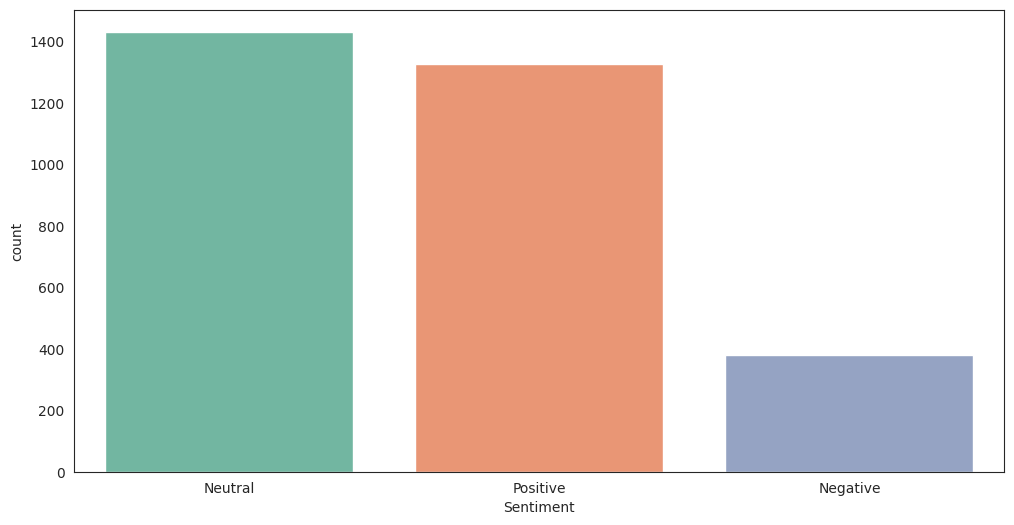

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=DFmid)

In [ ]:
DFmid['temp_list'] = DFmid['Tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in DFmid['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,1137
1,to,906
2,I,874
3,and,672
4,of,493
5,a,486
6,is,441
7,for,411
8,:,391
9,you,388


In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Kanye Tweets', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

##### Here, we can see the dominance of stopwords such as prepositions and conjunctions. Thus we use the NLTK library to implement filter of stopwords

##### Overall WordCloud

In [ ]:
df = DFmid

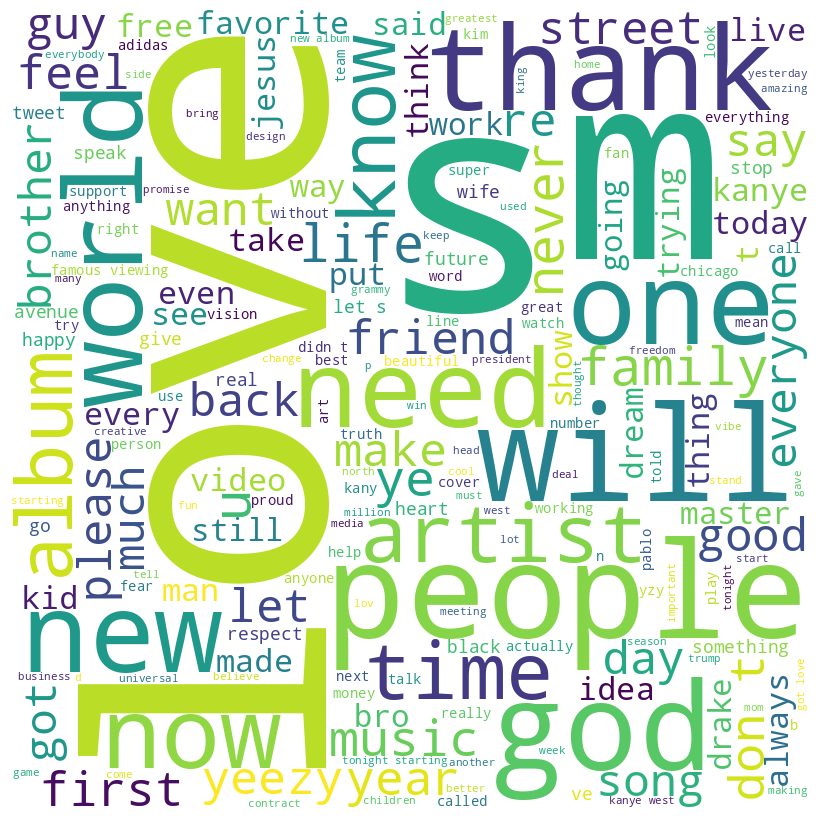

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in DFmid.Tweet:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Negative Wordcloud

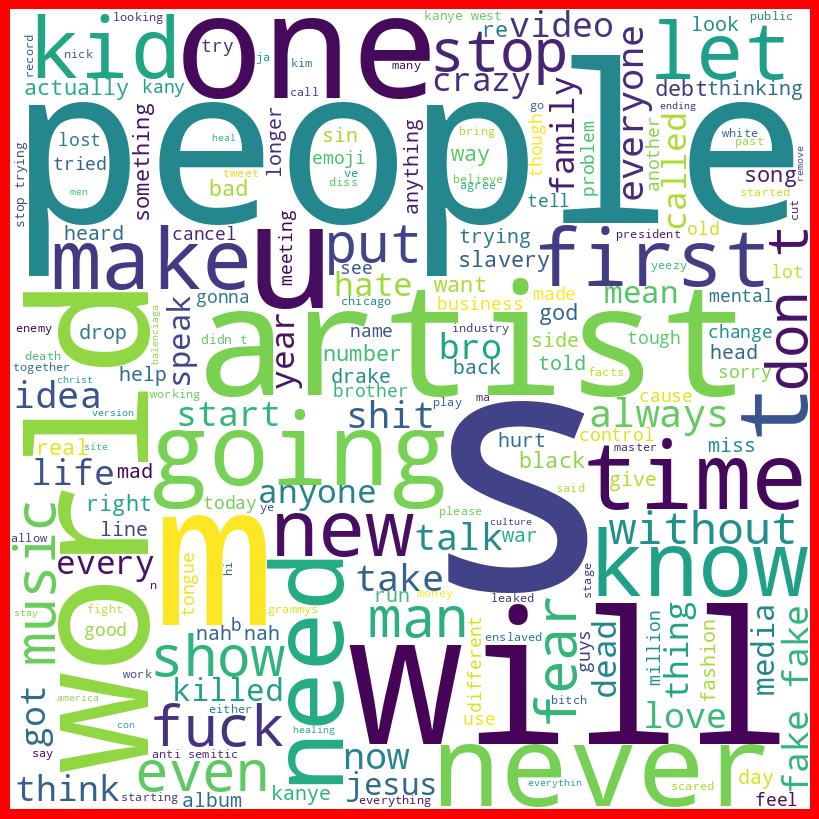

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

df_negative = df[df["Sentiment"]== "Negative"]
# iterate through the csv file
for val in df_negative.Tweet:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = "red")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### Positive Wordcloud

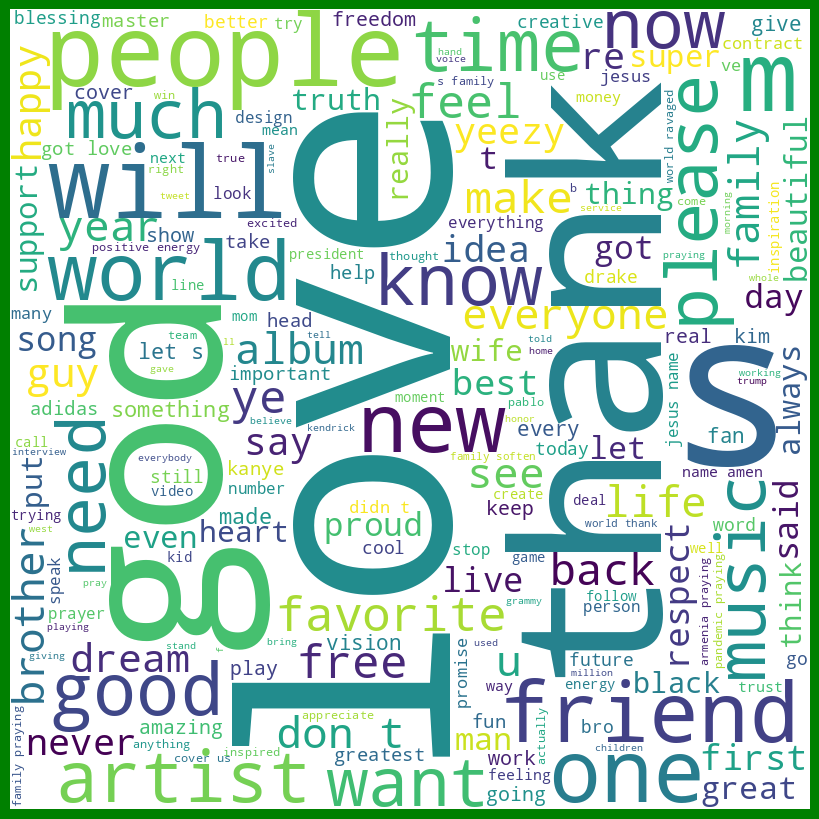

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

df_positive = df[df["Sentiment"]== "Positive"]
# iterate through the csv file
for val in df_positive.Tweet:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = "green")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()